# This is just a small sample analysis of the Steam data we've collected and processed

### Table of contents

* Importing data

* Checking tables

* Analysis: Are Sci-fi RPGs more popular than Fantasy ones?

    * Task
    * Reorganizing data
    * Making plots
    * Analyzing the results


In [1]:
# Module imports
# standard library imports
import csv
import datetime as dt
import json
import os
import statistics
import time
import re
import ast
import itertools

# third-party imports
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Loading data tables
steam = pd.read_csv('../data/export/steam.csv')
missing_ids = pd.read_csv('../data/export/missing_ids.csv')
steam_description_data = pd.read_csv('../data/export/steam_description_data.csv')
steam_media_data = pd.read_csv('../data/export/steam_media_data.csv')
steam_optional = pd.read_csv('../data/export/steam_optional.csv')
steam_packages_info = pd.read_csv('../data/export/steam_packages_info.csv')
steam_requirements_data = pd.read_csv('../data/export/steam_requirements_data.csv')
steam_support_info = pd.read_csv('../data/export/steam_support_info.csv')
steamspy_tag_data = pd.read_csv('../data/export/steamspy_tag_data.csv')

## Let's check our tables:

In [3]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102504 entries, 0 to 102503
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   appid                102504 non-null  int64  
 1   type                 102504 non-null  object 
 2   name                 102504 non-null  object 
 3   required_age         102504 non-null  int64  
 4   dlc                  9696 non-null    object 
 5   fullgame             34607 non-null   object 
 6   supported_languages  102352 non-null  object 
 7   developers           102463 non-null  object 
 8   publishers           102464 non-null  object 
 9   packages             81153 non-null   object 
 10  platforms            102504 non-null  object 
 11  categories           102398 non-null  object 
 12  genres               102311 non-null  object 
 13  achievements         102504 non-null  float64
 14  release_date         95676 non-null   object 
 15  supported_audio  

In [4]:
steam.sample(10)

appid  type                                               name  \
23706   614720   dlc  Fantasy Grounds - 0one's Colorprints #9: Woodl...   
71512  1429820  game                                         Neko Nyaa~   
27245   679490  game                              Lisa's Memory - 丽莎的记忆   
39932   899876   dlc  Rocksmith® 2014 Edition – Remastered – 2000s M...   
98323  1893590  game                                      Cat Follow Me   
9073    355341   dlc  FSX: Steam Edition - Piper PA-34-200T Seneca I...   
25523   648730   dlc                            Carcassonne - The River   
11299   390670  game                                        Steel Ocean   
93473  1799590  game                            Red Colony 3 Uncensored   
29031   711210  game                                              StepX   

       required_age        dlc  \
23706             0        NaN   
71512             0        NaN   
27245             0  [1015960]   
39932             0        NaN   
98323             0        NaN   
9073              0        NaN   
25523             0        NaN   
11299             0        NaN   
93473             0        NaN   
29031             0        NaN   

                                                fullgame  \
23706  {'appid': '252690', 'name': 'Fantasy Grounds C...   
71512                                                NaN   
27245                                                NaN   
39932  {'appid': '221680', 'name': 'Rocksmith® 2014 E...   
98323                                                NaN   
9073   {'appid': '314160', 'name': 'Microsoft Flight ...   
25523  {'appid': '598810', 'name': 'Carcassonne - Til...   
11299                                                NaN   
93473                                                NaN   
29031                                                NaN   

                                     supported_languages  \
23706                                        ['English']   
71512                                        ['English']   
27245                             ['Simplified Chinese']   
39932  ['English', 'French', 'German', 'Italian', 'Ja...   
98323                                        ['English']   
9073                                         ['English']   
25523  ['English', 'French', 'German', 'Italian', 'Sp...   
11299  ['English', 'Japanese', 'Korean', 'Russian', '...   
93473         ['English', 'Japanese', 'Spanish - Spain']   
29031                                        ['English']   

                                developers  \
23706              ['SmiteWorks USA, LLC']   
71512                       ['BrickCream']   
27245                  ['AliveGameStudio']   
39932          ['Ubisoft - San Francisco']   
98323                       ['NENEN SOFT']   
9073                          ['Carenado']   
25523  ['Asmodee Digital', 'Frima Studio']   
11299             ['Changyou.com Limited']   
93473                       ['RunicCodes']   
29031                ['LillyWelland inc.']   

                                publishers  packages  ... coming_soon  price  \
23706              ['SmiteWorks USA, LLC']  [164753]  ...       False   3.99   
71512                       ['BrickCream']  [502171]  ...       False   1.59   
27245                  ['AliveGameStudio']  [193967]  ...       False   6.59   
39932          ['Ubisoft - San Francisco']  [288244]  ...       False   7.99   
98323                       ['NENEN SOFT']  [681957]  ...       False   0.79   
9073           ['Dovetail Games - Flight']   [62574]  ...       False  22.99   
25523  ['Asmodee Digital', 'Frima Studio']  [182448]  ...       False   2.99   
11299             ['Changyou.com Limited']       NaN  ...       False   0.00   
93473          ['RunicCodes', 'Shinyuden']  [646524]  ...       False   8.19   
29031                   ['Bitlock Studio']  [205657]  ...       False   0.79   

      review_score  total_positive total_negative     rating          owners  \
23706          0.0

In [5]:
steam[['name','supported_languages']].sample(10)

name  \
34441  Maiden City: The Last Collateral Damage   
45600       Fishing Planet: Revolutionary Pack   
41891       FlyWings 2018 - Embraer 190 Family   
70239            ScourgeBringer Supporter Pack   
32203                           Orcz Evolve VR   
41665            Visual Novel Maker - Dystopia   
83769                                   Django   
12380                Liftoff: FPV Drone Racing   
87737      Tiger Fighter 1931 Tora!Tora! MP003   
29531                         Armed Warrior VR   

                                     supported_languages  
34441                 ['English', 'Traditional Chinese']  
45600  ['Dutch', 'English', 'French', 'German', 'Ital...  
41891                                        ['English']  
70239                                        ['English']  
32203                                        ['English']  
41665                            ['English', 'Japanese']  
83769                                        ['English']  
12380                              ['English', 'French']  
87737                                        ['English']  
29531                                        ['English']

In [6]:
def f(x):
    if pd.isna(x):
        return []
    try:
        return ast.literal_eval(str(x))   
    except Exception as e:
        print(e)
        return []
    
temp_df = steam[['name','supported_languages']].copy()
#temp_df['supported_languages'] = temp_df['supported_languages'].fillna("[]")
#temp_df['supported_languages'] = temp_df['supported_languages'].apply(lambda x:f(x))
temp_df['supported_languages'] = temp_df[temp_df['supported_languages'].notnull()]['supported_languages'].apply(eval)
temp_df.explode('supported_languages')

name  supported_languages
0                             Counter-Strike              English
0                             Counter-Strike               French
0                             Counter-Strike               German
0                             Counter-Strike              Italian
0                             Counter-Strike               Korean
...                                      ...                  ...
102503  Bioshock Infinite: Columbia's Finest             Japanese
102503  Bioshock Infinite: Columbia's Finest               Polish
102503  Bioshock Infinite: Columbia's Finest  Portuguese - Brazil
102503  Bioshock Infinite: Columbia's Finest              Russian
102503  Bioshock Infinite: Columbia's Finest      Spanish - Spain

[412053 rows x 2 columns]

In [7]:
missing_ids.sample(10)

appid            reason
172    NaN  Missing app name
469    NaN  Missing app name
68     NaN  Missing app name
421    NaN  Missing app name
526    NaN  Missing app name
690    NaN  Missing app name
363    NaN  Missing app name
546    NaN  Missing app name
669    NaN  Missing app name
320    NaN  Missing app name

In [8]:
steam_description_data.sample(10)

appid                               detailed_description  \
31681   758210  You are trapped, with a bomb ticking nearby. Y...   
11520   396090  <h1>Our Next Game!</h1><p><a href="https://sto...   
97963  1889740  <img src="https://cdn.akamai.steamstatic.com/s...   
19717   547900  Front Office Football is a text-based sports s...   
90588  1750010  <h2 class="bb_tag"><strong>A platformer like y...   
42381   946810  <strong>You must escape from your home!!</stro...   
53762  1133000  <img src="https://cdn.akamai.steamstatic.com/s...   
59689  1223000  <h2 class="bb_tag">Unlock the new four sisters...   
47567  1034780  Ellen Official Soundtracks are all the origina...   
92788  1792320  Give your game’s girls a voice with Japanese S...   

                                          about_the_game  \
31681  You are trapped, with a bomb ticking nearby. Y...   
11520  You led the revolution that freed the People's...   
97963  <img src="https://cdn.akamai.steamstatic.com/s...   
19717  Front Office Football is a text-based sports s...   
90588  <h2 class="bb_tag"><strong>A platformer like y...   
42381  <strong>You must escape from your home!!</stro...   
53762  <img src="https://cdn.akamai.steamstatic.com/s...   
59689  <h2 class="bb_tag">Unlock the new four sisters...   
47567  Ellen Official Soundtracks are all the origina...   
92788  Give your game’s girls a voice with Japanese S...   

                                       short_description  
31681  Look for hints and disable the bomb. Now!! You...  
11520  Assume control of a Middle Eastern country rec...  
97963  Paper Trail is a top-down puzzle adventure abo...  
19717  Put yourself in the Front Office with Front Of...  
90588  Bounce and bump in this fresh take on the plat...  
42381  You must escape from your home.Somebody invade...  
53762  X4: Split Vendetta is the first big expansion ...  
59689  Unlock the new four sisters for players to cha...  
47567                     Official Soundtrack From Ellen  
92788  Introducing Japanese School Girls Vol. 5, a co...

In [9]:
steam_media_data.sample(10)

appid                                       header_image  \
55720  1164330  https://cdn.akamai.steamstatic.com/steam/apps/...   
72747  1453660  https://cdn.akamai.steamstatic.com/steam/apps/...   
74437  1483470  https://cdn.akamai.steamstatic.com/steam/apps/...   
37478   861732  https://cdn.akamai.steamstatic.com/steam/apps/...   
11811   401680  https://cdn.akamai.steamstatic.com/steam/apps/...   
87159  1699800  https://cdn.akamai.steamstatic.com/steam/apps/...   
65551  1330420  https://cdn.akamai.steamstatic.com/steam/apps/...   
22974   602818  https://cdn.akamai.steamstatic.com/steam/apps/...   
52722  1117680  https://cdn.akamai.steamstatic.com/steam/apps/...   
8446    345650  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                             screenshots  \
55720  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
72747  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
74437  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
37478  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
11811  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
87159  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
65551  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
22974  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
52722  [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   
8446   [{'id': 0, 'path_thumbnail': 'https://cdn.akam...   

                                              background  \
55720  https://cdn.akamai.steamstatic.com/steam/apps/...   
72747  https://cdn.akamai.steamstatic.com/steam/apps/...   
74437  https://cdn.akamai.steamstatic.com/steam/apps/...   
37478  https://cdn.akamai.steamstatic.com/steam/apps/...   
11811  https://cdn.akamai.steamstatic.com/steam/apps/...   
87159  https://cdn.akamai.steamstatic.com/steam/apps/...   
65551  https://cdn.akamai.steamstatic.com/steam/apps/...   
22974  https://cdn.akamai.steamstatic.com/steam/apps/...   
52722  https://cdn.akamai.steamstatic.com/steam/apps/...   
8446   https://cdn.akamai.steamstatic.com/steam/apps/...   

                                                  movies  
55720  [{'id': 256762631, 'name': 'Smile to Fly- Trai...  
72747  [{'id': 256816720, 'name': 'Gameplay Introduct...  
74437  [{'id': 256840215, 'name': 'Steam Trailer #2',...  
37478                                                NaN  
11811  [{'id': 256669416, 'name': 'POSTAL Redux Co-Op...  
87159                                                NaN  
65551                                                NaN  
22974                                                NaN  
52722  [{'id': 256761308, 'name': 'Hentai Cyberpunk S...  
8446   [{'id': 2036743, 'name': 'Without Within - Tra...

In [10]:
steam_optional.sample(10)

appid drm_notice ext_user_account_notice      demos  \
7551   1001040        NaN                     NaN        NaN   
14887  1420630        NaN                     NaN  [1628160]   
3881    565980        NaN                     NaN   [565990]   
21161  1840490        NaN                     NaN        NaN   
22262  1936360        NaN                     NaN        NaN   
5607    825550        NaN                     NaN        NaN   
3131    449340        NaN                     NaN   [454360]   
2646    389140        NaN                     NaN   [891900]   
19458  1727030        NaN                     NaN  [1727050]   
697      49900        NaN                     NaN        NaN   

                                     content_descriptors  metacritic_score  \
7551   Glorious Companions features depictions of vio...               NaN   
14887                                                NaN               NaN   
3881                                                 NaN               NaN   
21161  Decapitations\r\nDismemberment\r\nEvisceration...               NaN   
22262  This game includes violence and gore.\r\n\r\nT...               NaN   
5607   - Girl x Girl relationships\r\n- A girl kisses...               NaN   
3131                                                 NaN               NaN   
2646                                                 NaN              76.0   
19458  The game contains references to violence. The ...               NaN   
697                                                  NaN              76.0   

                                          metacritic_url  
7551                                                 NaN  
14887                                                NaN  
3881                                                 NaN  
21161                                                NaN  
22262                                                NaN  
5607                                                 NaN  
3131                                                 NaN  
2646   https://www.metacritic.com/game/pc/horizon-cha...  
19458                                                NaN  
697    https://www.metacritic.com/game/pc/plain-sight...

In [11]:
steam_packages_info.sample(10)

appid     type                                           title  \
62694  1478560  default       Buy The Tower Of TigerQiuQiu Tiger Bomber   
39667   982320  default                         Buy Battle of the Boros   
4145    267340  default                         Buy Beware Planet Earth   
60564  1428790  default                                     Buy MADHACK   
5411    295079  default  Buy Rocksmith® 2014 – Jimi Hendrix - “Freedom”   
38081   950730  default                         Buy Fallen Sky -Online-   
53465  1259130  default                                  Buy Rover Wars   
71508  1694100  default                                       Buy 幸存者乐园   
75530  1780940  default                 Buy Inquisitor’s Heart and Soul   
75886  1789380  default              Buy The Ball Flow - First Approach   

       is_recurring_subscription  \
62694                      False   
39667                      False   
4145                       False   
60564                      False   
5411                       False   
38081                      False   
53465                      False   
71508                      False   
75530                      False   
75886                      False   

                                                    subs  
62694  [{'packageid': 520754, 'percent_savings_text':...  
39667  [{'packageid': 323201, 'percent_savings_text':...  
4145   [{'packageid': 35114, 'percent_savings_text': ...  
60564  [{'packageid': 501829, 'percent_savings_text':...  
5411   [{'packageid': 42282, 'percent_savings_text': ...  
38081  [{'packageid': 309512, 'percent_savings_text':...  
53465  [{'packageid': 437312, 'percent_savings_text':...  
71508  [{'packageid': 603672, 'percent_savings_text':...  
75530  [{'packageid': 639273, 'percent_savings_text':...  
75886  [{'packageid': 642639, 'percent_savings_text':...

In [12]:
steam_requirements_data.sample(10)

appid                                    pc_requirements  \
10127   649790  {'minimum': '<strong>Minimum:</strong><br><ul ...   
12560   748030  {'minimum': '<strong>Minimum:</strong><br><ul ...   
21512  1109800  {'minimum': '<strong>Minimum:</strong><br><ul ...   
37387  1742700  {'minimum': '<strong>Minimum:</strong><br><ul ...   
7906    556960  {'minimum': '<strong>Minimum:</strong><br><ul ...   
8402    575630  {'minimum': '<strong>Minimum:</strong><br><ul ...   
26910  1303314  {'minimum': '<strong>Minimum:</strong><br><ul ...   
7522    542100  {'minimum': '<strong>Minimum:</strong><br><ul ...   
33166  1558970  {'minimum': '<strong>Minimum:</strong><br><ul ...   
736     219740  {'minimum': '<strong>Minimum:</strong><br><ul ...   

                                        mac_requirements  \
10127  {'minimum': '<strong>Minimum:</strong><br><ul ...   
12560  {'minimum': '<strong>Minimum:</strong><br><ul ...   
21512  {'minimum': '<strong>Minimum:</strong><br><ul ...   
37387  {'minimum': '<strong>Minimum:</strong><br><ul ...   
7906   {'minimum': '<strong>Minimum:</strong><br><ul ...   
8402   {'minimum': '<strong>Minimum:</strong><br><ul ...   
26910  {'minimum': '<strong>Minimum:</strong><br><ul ...   
7522   {'minimum': '<strong>Minimum:</strong><br><ul ...   
33166  {'minimum': '<strong>Minimum:</strong><br><ul ...   
736    {'minimum': '<strong>Minimum:</strong><br><ul ...   

                                      linux_requirements  \
10127  {'minimum': '<strong>Minimum:</strong><br><ul ...   
12560                                                 []   
21512  {'minimum': '<strong>Minimum:</strong><br><ul ...   
37387  {'minimum': '<strong>Minimum:</strong><br><ul ...   
7906   {'minimum': '<strong>Minimum:</strong><br><ul ...   
8402   {'minimum': '<strong>Minimum:</strong><br><ul ...   
26910                                                 []   
7522                                                  []   
33166  {'minimum': '<strong>Minimum:</strong><br><ul ...   
736    {'minimum': '<strong>Minimum:</strong><br><ul ...   

                                              pc_minimum  \
10127  OS: Windows 7/8/10 (32/64bit versions) Process...   
12560  OS: WindowsR 7/8/8.1/10 (32bit/64bit) Processo...   
21512  OS: Windows 7 Processor: 1 GHz Memory: 2 GB RA...   
37387  OS: Windows XP Processor: 1.2 GHz Pentium 4 Me...   
7906   Requires a 64-bit processor and operating syst...   
8402   OS: Windows XP Processor: SSE2 instruction set...   
26910  OS: Windows® 8.1 64 bit or Windows® 10 Home 64...   
7522   OS: Windows XP Processor: Dual-core Memory: 2 ...   
33166  Requires a 64-bit processor and operating syst...   
736    OS:Windows XP/Vista/Windows 7/Windows 8 Proces...   

                                          pc_recommended  \
10127                                                NaN   
12560                                                NaN   
21512  OS: Windows 10 Processor: 2 GHz Memory: 4 GB R...   
37387                                                NaN   
7906    Requires a 64-bit processor and operating system   
8402   OS: Windows 7 or later Processor: Intel Pentiu...   
26910  OS: Windows® 10 Home 64 bit Processor: Intel® ...   
7522                                                 NaN   
33166  Requires a 64-bit processor and operating syst...   
736                                                  NaN   

                                             mac_minimum  \
10127  OS: Mac OS X 10.8+ Processor: Dual-Core: 2Ghz ...   
12560  OS: Mac OS X 10.10 or better Processor: Intel ...   
21512  OS: Mac OS X 10.6 Processor: 1 GHz Memory: 2 G...   
37387  OS: OSX Leopard 10.5.8 or later Memory: 512 MB...   
7906   Requires a 64-bit processor and operating syst...   
8402   OS: OS X 10.7 Lion Processor: 2.0 GHz Memory: ...   
26910  OS: High Sierra (MAC OS X 10.13.6) Metal requi...   
7522   OS: OS X Processor: Dual-core Memory: 2 GB RAM...   
33166  Requires a 64-bit processor and operating syst...   
736  

In [13]:
steam_support_info.sample(10)

appid                                          website  \
96623  1870400  https://froggycupcakegames.wixsite.com/site/ssm   
72        3580           http://www.popcap.com/games/wizardspen   
85854  1690140               https://steam.worldofwarships.com/   
47769  1045280         https://www.daydreamsoftware.es/?lang=en   
55762  1170500                                              NaN   
67949  1377150                   http://www.operation-tango.com   
24762   640380                                              NaN   
63192  1288550                                              NaN   
88522  1720442                                              NaN   
94924  1836320                                              NaN   

                                             support_url  \
96623  https://forms.monday.com/forms/e6842600c60ed0c...   
72                                                   NaN   
85854       https://wargaming.net/support/products/wows/   
47769                    https://www.daydreamsoftware.es   
55762                                                NaN   
67949                        http://www.clever-plays.com   
24762          https://www.facebook.com/waltermachadodev   
63192                   https://twitter.com/TheNewTropic   
88522                        https:\\www.tigerqiuqiu.com   
94924         https://supercooledgames.godaddysites.com/   

                       support_email  
96623  froggycupcakestudio@gmail.com  
72                               NaN  
85854                            NaN  
47769       info@daydreamsoftware.es  
55762           konring043@gmail.com  
67949          info@clever-plays.com  
24762                            NaN  
63192          d-s-lewis@outlook.com  
88522        support@tigerqiuqiu.com  
94924   Videogamemaster709@gmail.com

In [14]:
steamspy_tag_data.sample(10)

appid  1980s  1990s  2.5d   2d  2d_fighter  2d_platformer  360_video  \
56479  1173920      0      0     0    0           0              0          0   
75397  1497680    176    105     0  158           0              0          0   
93444  1799820      0      0     0  135           0              0          0   
52607  1113823      0      0     0    0           0              0          0   
96752  1860520      0      0     0    0           0              0          0   
6596    314790      0      0     0    7           0              0          0   
41131   923890      0      0     0    0           0              0          0   
83707  1645570     25      0     0   35           0              0          0   
8516    346060      0      0     0    0           0              0          0   
67218  1356850      0      0     0    0           0              0          0   

       3d  3d_fighter  ...  web_publishing  well_written  werewolves  western  \
56479   0           0  ...               0             0           0        0   
75397   0           0  ...               0             0           0        0   
93444   0           0  ...               0             0           0        0   
52607   0           0  ...               0             0           0        0   
96752   0           0  ...               0             0           0        0   
6596    0           0  ...               0             0           0        0   
41131   0           0  ...               0             0           0        0   
83707   0           0  ...               0             0           0        0   
8516    0           0  ...               0             0           0        0   
67218   0           0  ...               0             0           0        0   

       word_game  world_war_i  world_war_ii  wrestling  zombies  e_sports  
56479          0            0             0          0        0         0  
75397          0            0             0          0        0         0  
93444          0            0             0          0        0         0  
52607          0            0             0          0        0         0  
96752          0            0             0          0        0         0  
6596           0            0             0          0        0         0  
41131          0            0             0          0        0         0  
83707          0            0             0          0        0         0  
8516           0            5             6          0        0         0  
67218          0            0             0          0        0         0  

[10 rows x 432 columns]

# Analysis: Are Sci-fi RPGs more popular than Fantasy ones?

## Task

* Determine how popular are Sci-Fi RPGs comparing to the Fantasy ones
    * Number of owners and number of games
    * Total number of tags and tags present
    * Real-time vs Turn-based
    * Changes over time
    

*Keep in mind, SteamSpy owners data is an estimate and might be quite different from the real game owner counts*

## Reorganizing data

### We'll need this data:

#### From steam:
* appid
* name
* type: game
* genres: RPG
* release_date
* coming_soon: False
* rating
* total_positive+total_negative
* owners: get average
* tags: filter by "Fantasy" "Sci-fi" "Cyberpunk"

#### From steamspy_tag_data:
* appid
* tags

In [15]:
# setting indexes
steam = steam.set_index("appid")
steamspy_tag_data = steamspy_tag_data.set_index("appid")

In [16]:
# filtering out the unneeded data part 1
analysis_df = steam[(steam["type"] == "game") 
                    & (steam["coming_soon"] == False)][["name",
                                                        "genres",
                                                        "release_date",
                                                        "rating","total_positive",
                                                        "total_negative",
                                                        "owners",
                                                        "tags"]].copy()
# unwrapping strings -> list
analysis_df['genres'] = analysis_df[analysis_df['genres'].notnull()]['genres'].apply(eval)
analysis_df['tags'] = analysis_df[analysis_df['tags'].notnull()]['tags'].apply(eval)
# setting some columns format
# total reviews
analysis_df['total_reviews'] = analysis_df['total_positive'] + analysis_df['total_negative']
# converting release_date
analysis_df['release_date'] = analysis_df['release_date'].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True).year)
def parse_owners(owners_str):
    owners_split = owners_str.split('-')
    result = (int(owners_split[0]) + int(owners_split[1])) // 2
    return result
# average owners
analysis_df["owners"] = analysis_df["owners"].apply(lambda x: 0 if x != x else parse_owners(x))

In [17]:
# genres values
analysis_df.genres.explode().value_counts(dropna=False)

Indie                    40367
Action                   23721
Casual                   23233
Adventure                21633
Simulation               10999
Strategy                 10748
RPG                       9632
Early Access              5994
Free to Play              4313
Sports                    2604
Racing                    2056
Massively Multiplayer     1444
Violent                    490
Gore                       290
Nudity                     113
Sexual Content             103
NaN                         95
Education                   20
Utilities                   11
Design & Illustration        8
Game Development             7
Software Training            6
Audio Production             5
Animation & Modeling         5
Web Publishing               4
Accounting                   3
Video Production             3
Movie                        2
Photo Editing                1
Documentary                  1
Episodic                     1
Short                        1
Tutorial

In [18]:
# filtering out genres
analysis_df.dropna(subset=['genres'], how='all', inplace = True)
genres_mask = analysis_df.genres.apply(lambda x: 'RPG' in x)

analysis_df = analysis_df[genres_mask]

In [19]:
# tags values
temp_df = analysis_df.dropna(subset=['tags'], how='all')
temp_df = temp_df.explode('tags')
temp_df['tags'].unique()

array(['RPG', 'First-Person', 'Classic', 'Atmospheric', 'Dark Fantasy',
       'Fantasy', 'Singleplayer', 'Immersive Sim', 'Underground',
       'Adventure', 'Action', 'Story Rich', 'Exploration', 'Magic',
       'Dungeon Crawler', 'Horror', 'Action RPG', 'Stealth', 'Open World',
       'Inventory Management', 'Third Person', 'Multiplayer', 'Medieval',
       'Character Customization', 'Hack and Slash', 'Co-op', 'Swordplay',
       'Multiple Endings', 'Gore', 'Indie', 'Mystery', 'Assassin',
       'Funny', 'Survival', 'Simulation', 'FPS', 'Comedy', 'Shooter',
       'Strategy', 'Difficult', 'Stylized', 'Replay Value', 'Puzzle',
       'Turn-Based Strategy', 'Female Protagonist', 'Turn-Based',
       'Hex Grid', 'Tactical', 'Turn-Based Combat', 'Tactical RPG',
       'Great Soundtrack', 'Pirates', 'Naval', 'Sandbox', 'Sailing',
       'Historical', 'Economy', 'Remake', 'Trading', 'Naval Combat',
       'Choose Your Own Adventure', 'Fighting', 'Loot',
       'Post-apocalyptic', 'Survival

In [20]:
# processing tags - removing tagless->exploding->filtering out rows we don't need
# removing rows without tags
analysis_df.dropna(subset=['tags'], how='all', inplace = True)
# exploding
analysis_df = analysis_df.explode('tags')

In [21]:
# filtering out all the tags we don't need
tags_list =["Anime", "Cyberpunk", "Dark Fantasy", "Fantasy", "Horror", "Medieval", "Space", "Sci-fi"]
analysis_df = analysis_df[analysis_df['tags'].isin(tags_list)]

In [22]:
analysis_df

name  \
appid                              
1700                 Arx Fatalis   
1700                 Arx Fatalis   
1700                 Arx Fatalis   
1930     Two Worlds Epic Edition   
1930     Two Worlds Epic Edition   
...                          ...   
1958230                    LOONY   
1960790       Battle of Heroes 3   
1960790       Battle of Heroes 3   
1965360               Wet Dreams   
1971980       Grey Eyes of Death   

                                                    genres  release_date  \
appid                                                                      
1700                                                 [RPG]        2007.0   
1700                                                 [RPG]        2007.0   
1700                                                 [RPG]        2007.0   
1930                                                 [RPG]        2009.0   
1930                                                 [RPG]        2009.0   
...                                                    ...           ...   
1958230       [Casual, Indie, RPG, Strategy, Early Access]        2022.0   
1960790  [Adventure, Free to Play, Indie, Massively Mul...        2022.0   
1960790  [Adventure, Free to Play, Indie, Massively Mul...        2022.0   
1965360                    [Adventure, Casual, Indie, RPG]        2022.0   
1971980                            [Adventure, Indie, RPG]        2022.0   

            rating  total_positive  total_negative   owners          tags  \
appid                                                                       
1700     83.058079          1208.0           176.0   350000  Dark Fantasy   
1700     83.058079          1208.0           176.0   350000       Fantasy   
1700     83.058079          1208.0           176.0   350000        Horror   
1930     73.400235          1605.0           507.0  1500000       Fantasy   
1930     73.400235          1605.0           507.0  1500000      Medieval   
...            ...             ...             ...      ...           ...   
1958230  55.686457             2.0             1.0    10000        Horror   
1960790  44.313543             1.0             2.0    10000      Medieval   
1960790  44.313543             1.0             2.0    10000       Fantasy   
1965360  59.416365             1.0             0.0    10000         Anime   
1971980  43.951406             3.0             5.0    10000        Horror   

         total_reviews  
appid                   
1700            1384.0  
1700            1384.0  
1700            1384.0  
1930            2112.0  
1930            2112.0  
...                ...  
1958230            3.0  
1960790            3.0  
1960790            3.0  
1965360            1.0  
1971980            8.0  

[6979 rows x 9 columns]

It looks like we don't have many games left. 

On the first look, it seems like that's because a lot of our games don't have the user tags. But let's see how many of these games are important by filtering out non-released games, games without the price or reviews:

In [23]:
steam[(steam["tags"].isnull()) 
      & (steam["type"] == "game") 
      & (steam["coming_soon"] == False) 
      & (steam["price"].notnull()) 
      & (steam["total_positive"]+steam["total_negative"] > 0)]

type                                           name  required_age  \
appid                                                                        
34330    game                            Total War: SHOGUN 2             0   
35030    game                      Championship Manager 2010             0   
37360    game                              Mahjong Roadshow™             0   
42680    game               Call of Duty®: Modern Warfare® 3            18   
56400    game  Warhammer 40,000: Dawn of War II: Retribution            18   
...       ...                                            ...           ...   
1953970  game                               MATH EXPRESSions             0   
1957060  game                                      NTR Dream             0   
1962440  game                       Memory Puzzle - Bad Girl             0   
1962840  game                     Hentai Girls - Neko Pastry             0   
1970710  game                     Sex Diary - Swingers Yacht             0   

                                                       dlc fullgame  \
appid                                                                 
34330    [223180, 201279, 201277, 34348, 34342, 34343, ...      NaN   
35030                                                  NaN      NaN   
37360                                                  NaN      NaN   
42680                         [42698, 42697, 42696, 42695]      NaN   
56400    [378041, 378040, 56431, 56432, 56433, 56434, 5...      NaN   
...                                                    ...      ...   
1953970                                          [1976070]      NaN   
1957060                                                NaN      NaN   
1962440                                                NaN      NaN   
1962840                                                NaN      NaN   
1970710                                                NaN      NaN   

                                       supported_languages  \
appid                                                        
34330    ['Czech', 'English', 'French', 'German', 'Ital...   
35030    ['English', 'French', 'Italian', 'Polish', 'Sp...   
37360                                          ['English']   
42680    ['English', 'French', 'German', 'Italian', 'Sp...   
56400    ['Czech', 'English', 'French', 'German', 'Ital...   
...                                                    ...   
1953970                                        ['English']   
1957060                                        ['English']   
1962440                                        ['English']   
1962840                                        ['English']   
1970710                                        ['English']   

                                                developers  \
appid                                                        
34330    ['CREATIVE ASSEMBLY', 'Feral Interactive (Mac)...   
35030                           ['Beautiful Game Studios']   
37360                                        ['PlayFirst']   
42680              ['Infinity Ward', 'Sledgehammer Games']   
56400    ['Relic Entertainment', 'Feral Interactive (Ma...   
...                                                    ...   
1953970                                       ['Mandinga']   
1957060                                    ['Byaka Games']   
1962440                                ['EroticGamesClub']   
1962840                                ['EroticGamesClub']   
1970710                                ['EroticGamesClub']   

                                                publishers  \
appid                                                        
34330    ['SEGA', 'Feral Interactive (Mac)', 'Feral Int...   
35030                                      ['Square Enix']   
37360                                        ['PlayFirst']   
42680                                       ['Activision']   
56400            ['SEGA', 'Feral Interactive (Mac/Linux)']   
...                   

Total positive reviews for these games:

In [24]:
temp_df = steam[(steam["tags"].isnull()) 
              & (steam["type"] == "game") 
              & (steam["coming_soon"] == False) 
              & (steam["price"].notnull()) 
              & (steam["total_positive"]+steam["total_negative"] > 0)]
print("Total reviews for selection:",temp_df["total_positive"].sum()+temp_df["total_negative"].sum())
print("Total games for selection:",temp_df["name"].count())

Total reviews for selection: 266703.0
Total games for selection: 1856


Doesn't seem like we have a lot of them but it might be a good idea to find a different way of working with these games in the future

In [25]:
analysis_df.groupby('tags').agg(total_owners=pd.NamedAgg(column='owners', aggfunc='sum'),
                                average_owners=pd.NamedAgg(column='owners', aggfunc='mean'),
                                median_owners=pd.NamedAgg(column='owners', aggfunc='median'),
                                total_games=pd.NamedAgg(column='name', aggfunc='count'),
                                total_reviews=pd.NamedAgg(column='total_reviews', aggfunc='sum'),
                                median_ratings=pd.NamedAgg(column='rating', aggfunc='median'))

total_owners  average_owners  median_owners  total_games  \
tags                                                                     
Anime            177115000   109600.866337        10000.0         1616   
Cyberpunk         50520000   273081.081081        35000.0          185   
Dark Fantasy     177480000   322690.909091        10000.0          550   
Fantasy          691020000   288767.237777        10000.0         2393   
Horror           157705000   252732.371795        35000.0          624   
Medieval         135580000   220097.402597        10000.0          616   
Sci-fi           267720000   386320.346320        35000.0          693   
Space             96510000   319569.536424        35000.0          302   

              total_reviews  median_ratings  
tags                                         
Anime             1745118.0       69.204267  
Cyberpunk          678781.0       68.944047  
Dark Fantasy      2305649.0       69.199408  
Fantasy           4799441.0       67.931725  
Horror            1338253.0       67.059371  
Medieval          1848150.0       65.871203  
Sci-fi            2650370.0       68.113726  
Space              481216.0       64.053445

## Making plots


### Boxplots

#### Owners

In [26]:
# getting tags
tags = analysis_df["tags"].unique().tolist()

In [27]:
analysis_df.owners.value_counts()

10000       3399
35000       1221
75000        705
150000       554
350000       517
750000       302
1500000      149
3500000      100
7500000       16
15000000       8
35000000       7
75000000       1
Name: owners, dtype: int64

In [28]:
temp_df = analysis_df[analysis_df["tags"] == "Fantasy"]
temp_df.sort_values(by = "owners", ascending = False)

name  \
appid                                
1063730                  New World   
1245620                 ELDEN RING   
1468810      鬼谷八荒 Tale of Immortal   
238960               Path of Exile   
292030   The Witcher® 3: Wild Hunt   
...                            ...   
1164480                 Killer Gin   
1162920           Time of the Moon   
1162010   奇幻与砍杀2 Fantasy & Blade Ⅱ   
1153550         Dark Fairy Fantasy   
1960790         Battle of Heroes 3   

                                                    genres  release_date  \
appid                                                                      
1063730    [Action, Adventure, Massively Multiplayer, RPG]        2021.0   
1245620                                      [Action, RPG]        2022.0   
1468810  [Action, Adventure, Indie, RPG, Simulation, Ea...        2021.0   
238960   [Action, Adventure, Free to Play, Indie, Massi...        2013.0   
292030                                               [RPG]        2015.0   
...                                                    ...           ...   
1164480                                              [RPG]        2020.0   
1162920                            [Adventure, Indie, RPG]        2019.0   
1162010  [Action, Adventure, Casual, Indie, RPG, Strategy]        2019.0   
1153550                                       [Indie, RPG]        2019.0   
1960790  [Adventure, Free to Play, Indie, Massively Mul...        2022.0   

            rating  total_positive  total_negative    owners     tags  \
appid                                                                   
1063730  67.272283        131767.0         62793.0  75000000  Fantasy   
1245620  89.204677        332613.0         36755.0  35000000  Fantasy   
1468810  52.964776         91090.0         80630.0  35000000  Fantasy   
238960   87.303061           998.0            81.0  35000000  Fantasy   
292030   96.589175        542175.0         14049.0  15000000  Fantasy   
...            ...             ...             ...       ...      ...   
1164480  68.145781             7.0             1.0     10000  Fantasy   
1162920  70.844323             5.0             0.0     10000  Fantasy   
1162010  68.910053            81.0            27.0     10000  Fantasy   
1153550  32.940629             0.0             3.0     10000  Fantasy   
1960790  44.313543             1.0             2.0     10000  Fantasy   

         total_reviews  
appid                   
1063730       194560.0  
1245620       369368.0  
1468810       171720.0  
238960          1079.0  
292030        556224.0  
...                ...  
1164480            8.0  
1162920            5.0  
1162010          108.0  
1153550            3.0  
1960790            3.0  

[2393 rows x 9 columns]

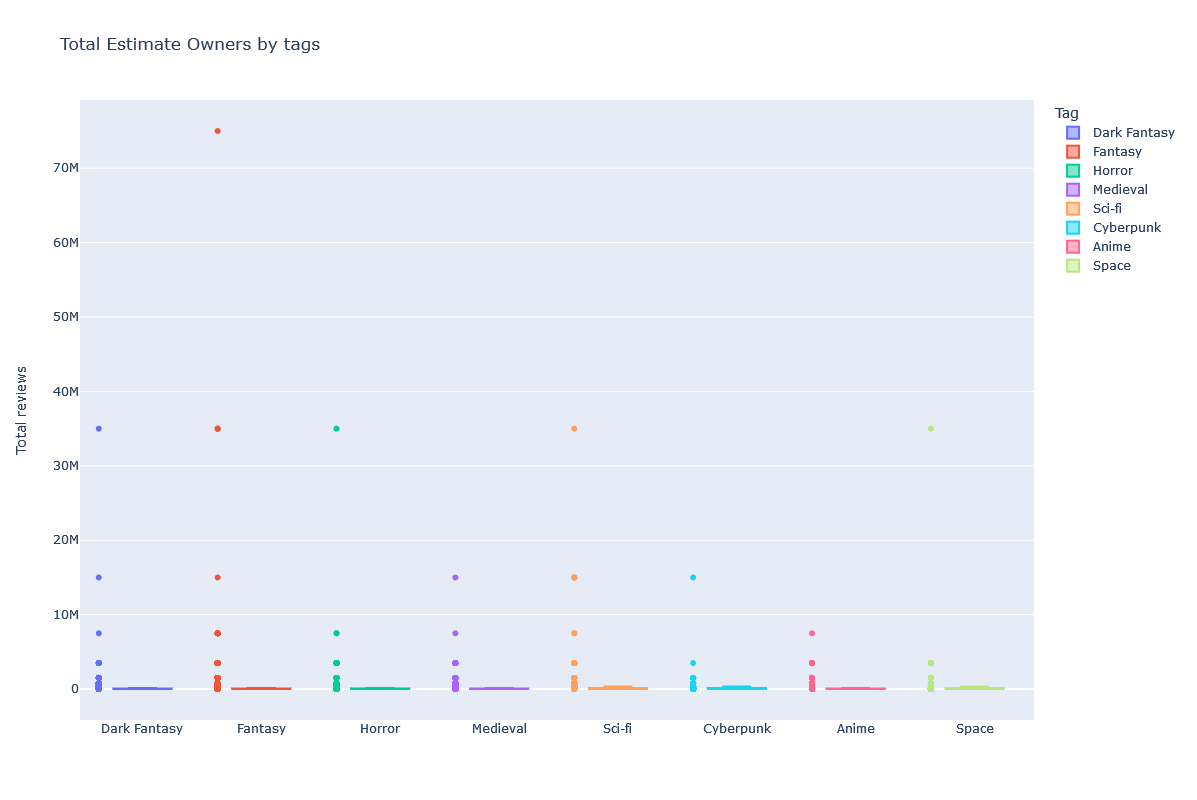

In [29]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["owners"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Owners: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Total Estimate Owners by tags",
    yaxis_title="Total reviews",
    legend_title="Tag",
    height=800
    )
    
fig.show()

#### Reviews

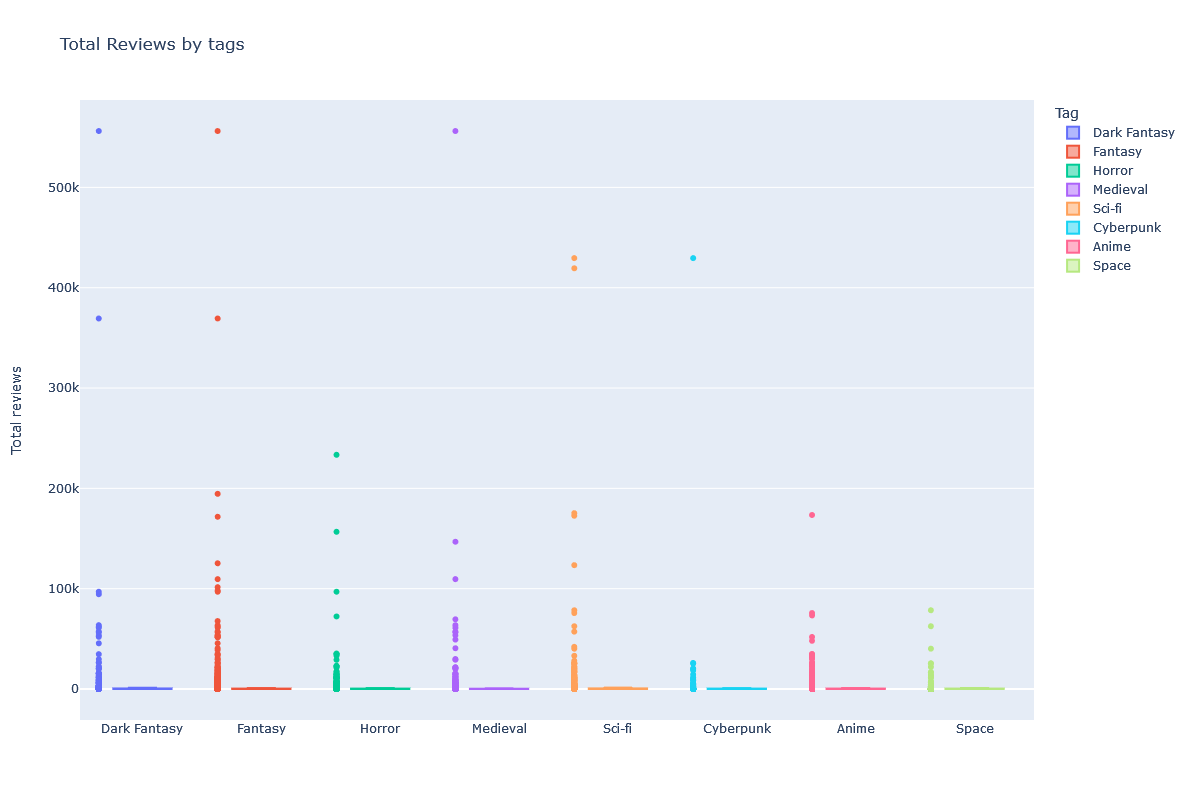

In [30]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["total_reviews"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Reviews: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Total Reviews by tags",
    yaxis_title="Total reviews",
    legend_title="Tag",
    height=800
    )
    
fig.show()

#### Ratings

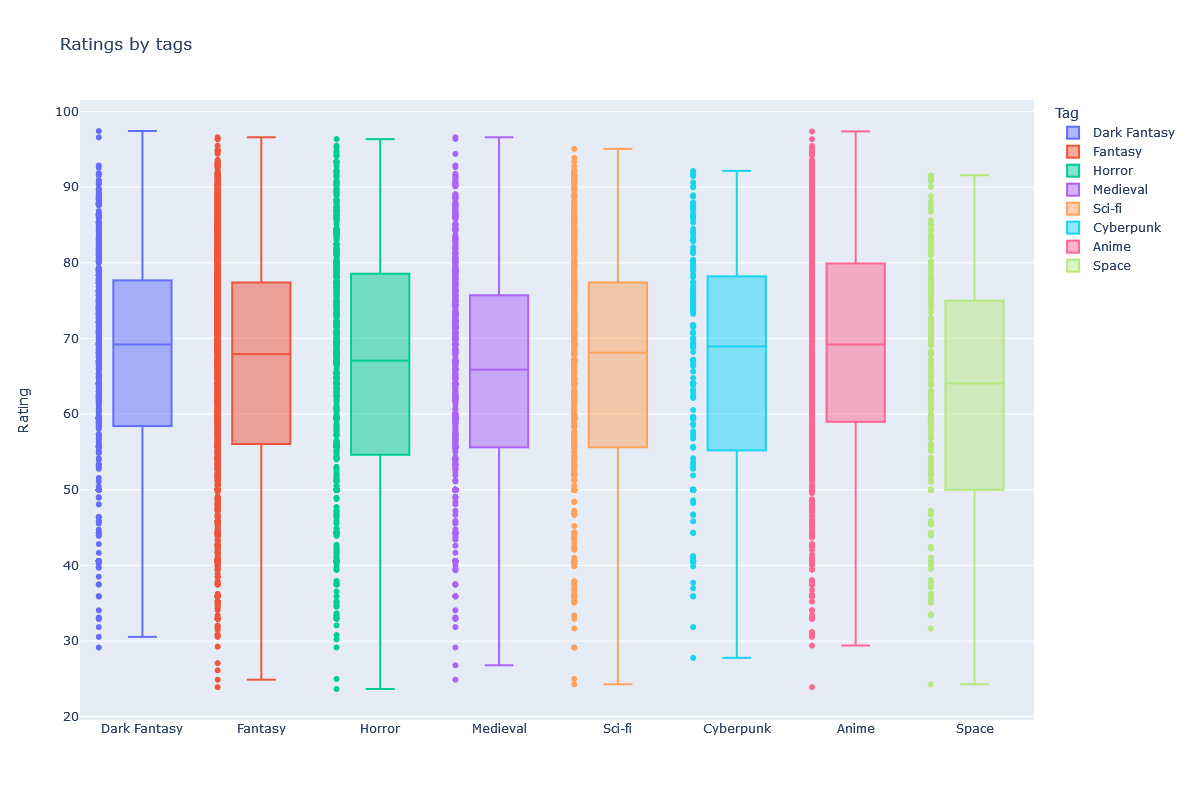

In [31]:
fig = go.Figure()

for tag in tags:
    fig.add_trace(go.Box(
        y=analysis_df[analysis_df["tags"]==tag]["rating"],
        name=tag,
        text = analysis_df[analysis_df["tags"]==tag]["name"],
        hovertemplate='<br>Game: %{text}<br>Rating: %{y}',
    ))
    
fig.update_traces(boxpoints='all',
                  jitter=0)

fig.update_layout(
    title="Ratings by tags",
    yaxis_title="Rating",
    legend_title="Tag",
    height=800
    )
    
fig.show()

### Timelines

#### Making timeline DF

In [45]:
# making timeline datatframe
timeline_df = analysis_df[analysis_df['tags'].isin(['Sci-fi','Fantasy','Medieval'])].groupby(['release_date','tags']).agg(
                                total_owners=pd.NamedAgg(column='owners', aggfunc='sum'),
                                average_owners=pd.NamedAgg(column='owners', aggfunc='mean'),
                                median_owners=pd.NamedAgg(column='owners', aggfunc='median'),
                                total_games=pd.NamedAgg(column='name', aggfunc='count'),
                                total_reviews=pd.NamedAgg(column='total_reviews', aggfunc='sum'),
                                median_ratings=pd.NamedAgg(column='rating', aggfunc='median')).reset_index()

#### Number of games

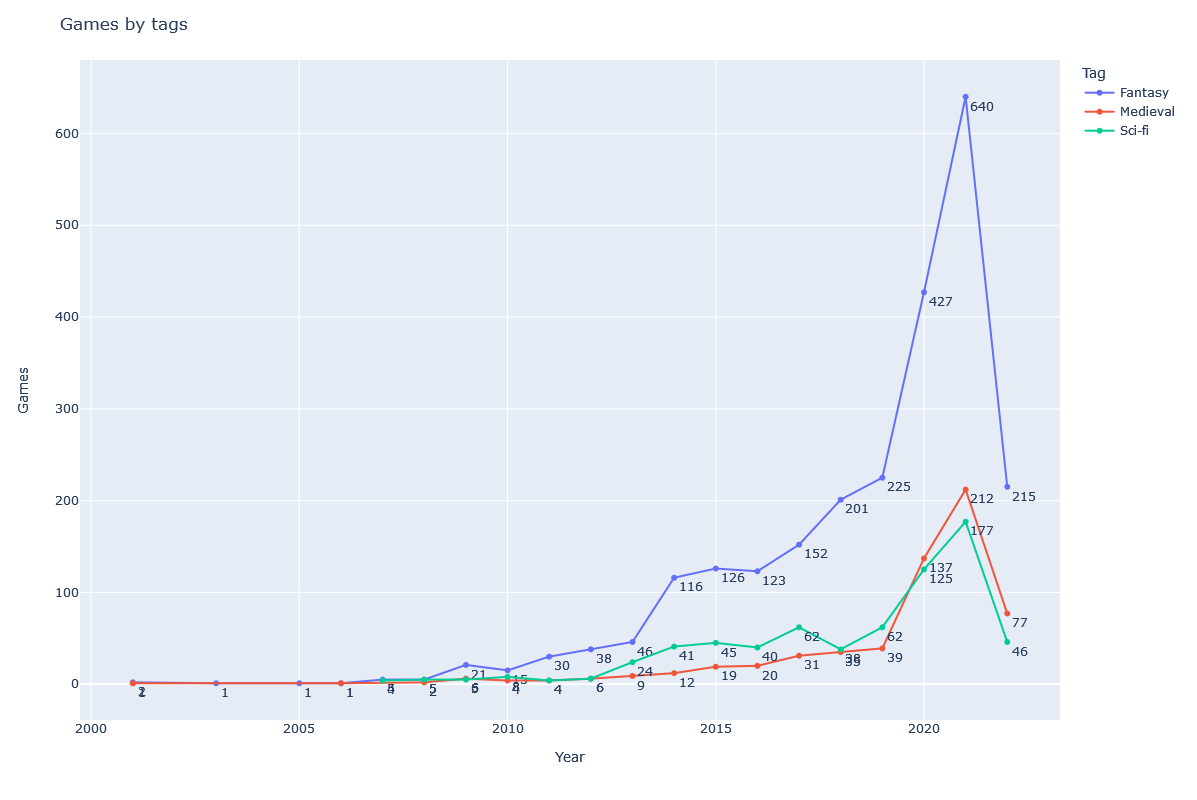

In [53]:
fig = px.line(timeline_df, x="release_date", y="total_games", color="tags", text="total_games")
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title="Games by tags",
    yaxis_title="Games",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

#### Owners

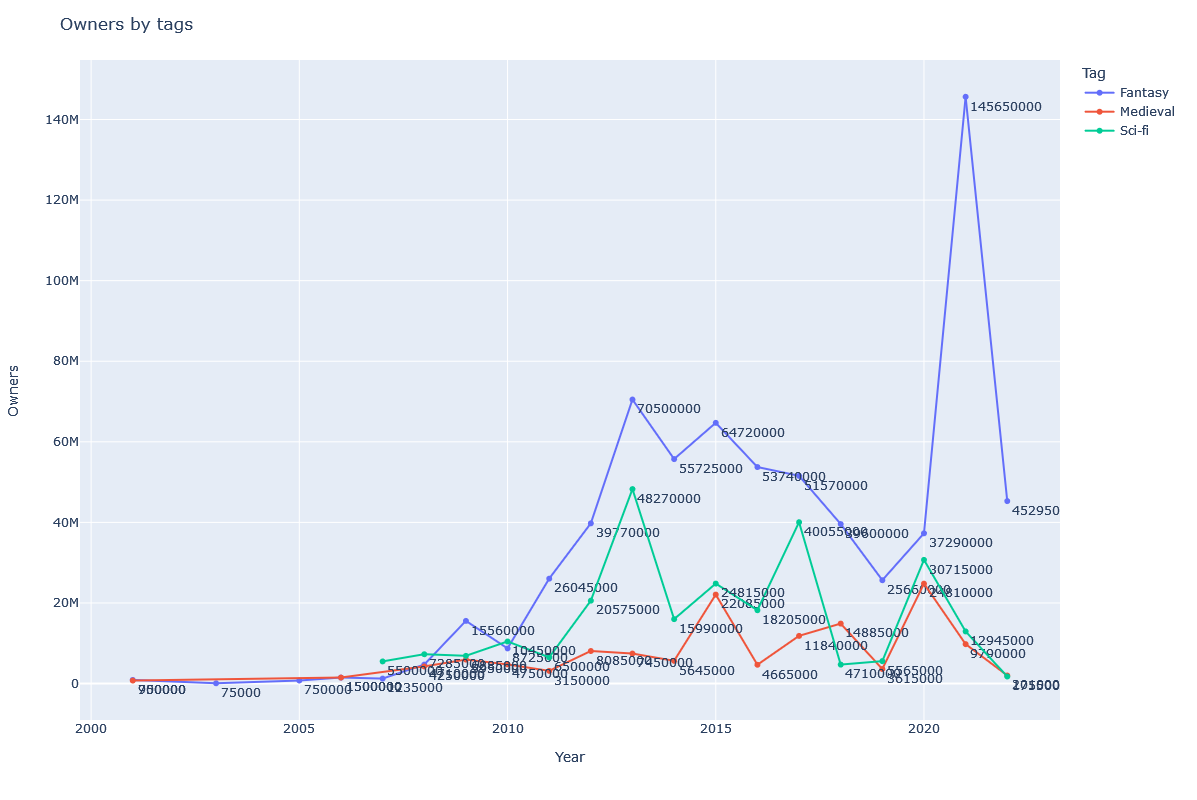

In [52]:
fig = px.line(timeline_df, x="release_date", y="total_owners", color="tags", text="total_owners")
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title="Owners by tags",
    yaxis_title="Owners",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

#### Reviews

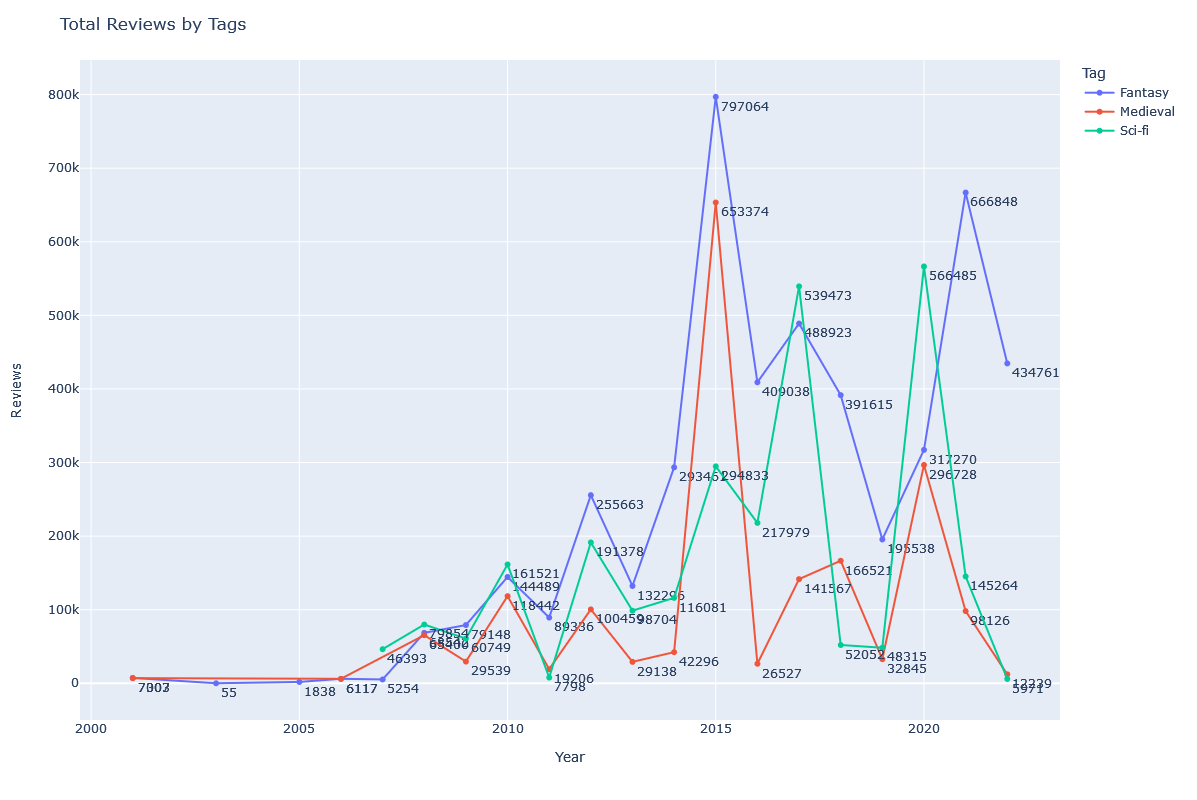

In [51]:
fig = px.line(timeline_df, x="release_date", y="total_reviews", color="tags", text="total_reviews")
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title="Total Reviews by Tags",
    yaxis_title="Reviews",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

#### Ratings

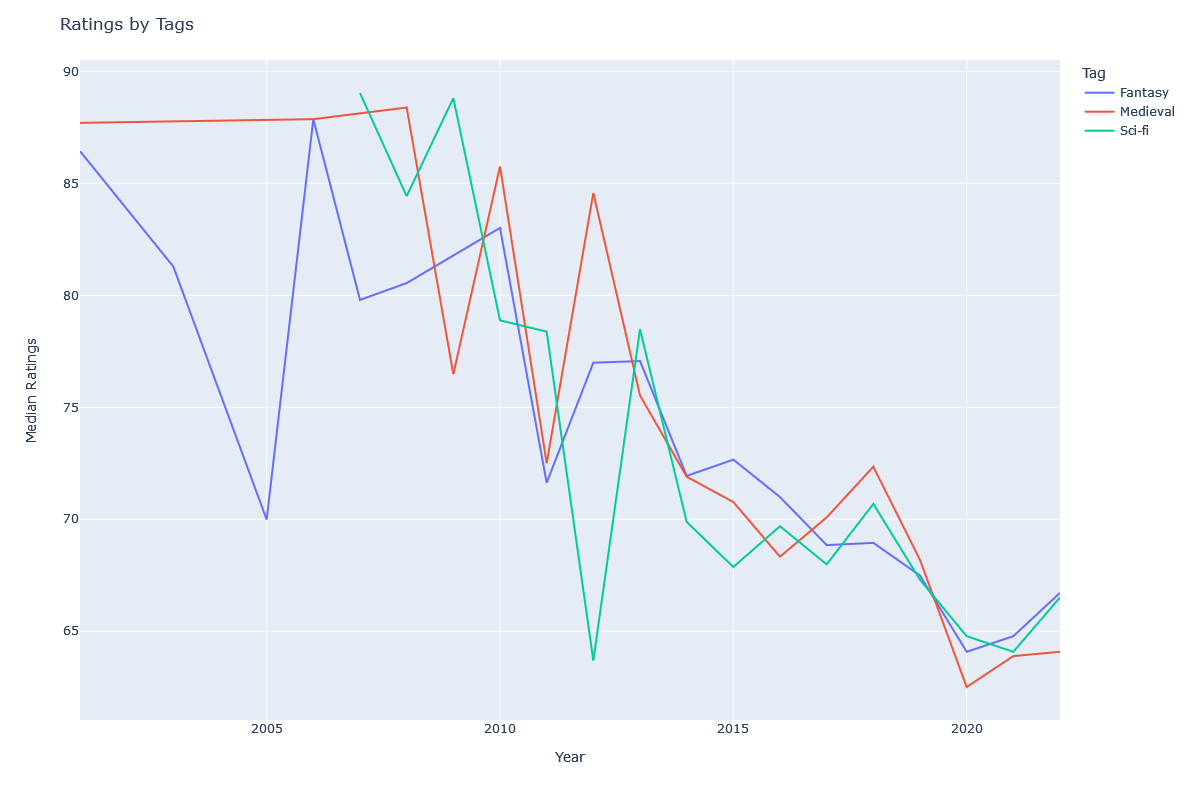

In [56]:
fig = px.line(timeline_df, x="release_date", y="median_ratings", color="tags")
fig.update_traces(textposition="bottom right")
fig.update_layout(
    title="Ratings by Tags",
    yaxis_title="Median Ratings",
    xaxis_title="Year",
    legend_title="Tag",
    height=800
    )
fig.show()

## Analyzing the results

* While the results seem interesting for the casual view, they are influenced too much by the outliers and need an adjustment for that
* A lot of data is either estimate (Owners) or not very complete (the tags we are taking info from)
* We can still make some observations based on the number of releases and the data distribution

## Random snippets

In [32]:
analysis_df[analysis_df["tags"]=="Space"].sort_values(by="total_reviews", ascending=False).head(50)

name  \
appid                                                        
211820                                           Starbound   
359320                                     Elite Dangerous   
17390                                               SPORE™   
1328670                     Mass Effect™ Legendary Edition   
261640                         Borderlands: The Pre-Sequel   
32370            STAR WARS™ - Knights of the Old Republic™   
208580   STAR WARS™ Knights of the Old Republic™ II - T...   
578650                                    The Outer Worlds   
17460                                   Mass Effect (2007)   
24980                 Mass Effect 2 Digital Deluxe Edition   
313340                                            Mountain   
1549970                             Aliens: Fireteam Elite   
402710                                    Osiris: New Dawn   
1238000             Mass Effect™: Andromeda Deluxe Edition   
8500                                            EVE Online   
290300                                        Rebel Galaxy   
728530                   SD GUNDAM G GENERATION CROSS RAYS   
979110                                         Space Haven   
238210                                      System Shock 2   
332500                                                GRAV   
214730                       Space Rangers HD: A War Apart   
236370                                Interstellar Marines   
1128920                                       EVERSPACE™ 2   
829590                                            CryoFall   
407840                        Guardians of Orion (Phase 2)   
236150                                  Starpoint Gemini 2   
230410                                            Warframe   
335620                             Star Traders: Frontiers   
419480                           Starpoint Gemini Warlords   
252470                         Space Pirates And Zombies 2   
244770                                            StarMade   
527100                             Star Trek™: Bridge Crew   
107200                           Space Pirates and Zombies   
238240                                       Edge of Space   
646270                                         60 Parsecs!   
324510                                           Boundless   
441790                                          Fragmented   
698640                                  Deep Sky Derelicts   
727130                                   Between the Stars   
863590                                      Starcom: Nexus   
1238020    Mass Effect™ 3 N7 Digital Deluxe Edition (2012)   
323060                                             Tharsis   
334420                                Out There: Ω Edition   
366910                               The Long Journey Home   
712190                    Genesis Alpha One Deluxe Edition   
609150   STAR OCEAN™ - THE LAST HOPE -™ 4K & Full HD Re...   
465490                                     Stellar Tactics   
386260                      Microcosmum: survival of cells   
371200                       Halcyon 6: Starbase Commander   
783170                                   INSOMNIA: The Ark   

                                                    genres  release_date  \
appid                                                                      
211820             [Action, Adventure, Casual, Indie, RPG]        2016.0   
359320   [Action, Adventure, Massively Multiplayer, RPG...        2015.0   
17390    [Action, Adventure, Casual, RPG, Simulation, S...        2008.0   
1328670                                      [Action, RPG]        2021.0   
261640                                       [Action, RPG]        2014.0   
32370                                     [Adventure, RPG]        2009.0   
208580                                               [RPG]        2012.0   
578650                                               [RPG]        2020.0   
17460                                        [Action, RPG]        200